# Problem Statement: To analyze the articles about Justin Trudeau in The Guardian using API data.

### Part-1. Data Extraction about Justin Trudeau from The Guardian

In [1]:
## Data Extraction from The Guardian API
import requests
import pandas as pd
import json
import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
url="https://content.guardianapis.com/search?q=%22justin%20trudeau%22&api-key=78fe2464-fbc7-4fe1-ba14-8349b50e7fed"

In [3]:
## Extracting the data from the url using requests
payload={'page-size': 200,
        'page':1}
r=requests.get(url, params=payload)

In [4]:
## checking the status code if data extraction is permitted
r.status_code

200

In [5]:
## reading the json contents from the request object
res=r.json()
res

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 2181,
  'startIndex': 1,
  'pageSize': 200,
  'currentPage': 1,
  'pages': 11,
  'orderBy': 'relevance',
  'results': [{'id': 'world/2023/nov/09/justin-trudeau-montreal-canada-jewish-schools',
    'type': 'article',
    'sectionId': 'world',
    'sectionName': 'World news',
    'webPublicationDate': '2023-11-09T22:56:11Z',
    'webTitle': 'Justin Trudeau condemns shots fired at two Jewish schools in Montreal',
    'webUrl': 'https://www.theguardian.com/world/2023/nov/09/justin-trudeau-montreal-canada-jewish-schools',
    'apiUrl': 'https://content.guardianapis.com/world/2023/nov/09/justin-trudeau-montreal-canada-jewish-schools',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'world/2023/aug/02/justin-trudeau-sophie-gregoire-trudeau-separation',
    'type': 'article',
    'sectionId': 'world',
    'sectionName': 'World news',
    'webPublicationDate': '2023-08-02T17:16:37Z',
 

In [6]:
## Normalizing the json data to dataframe
df=pd.json_normalize(res['response'])

In [7]:
## Normalizing again the json data to get the relevant data in dataframe
df=pd.json_normalize(df['results'][0])

In [8]:
df

id      type  \
0    world/2023/nov/09/justin-trudeau-montreal-cana...   article   
1    world/2023/aug/02/justin-trudeau-sophie-gregoi...   article   
2    world/2023/sep/11/canada-pm-justin-trudeau-stu...   article   
3    world/2024/apr/03/canada-mikmaw-fishermen-left...   article   
4    world/2024/feb/29/brian-mulroney-canadian-pm-d...   article   
..                                                 ...       ...   
195  environment/2022/dec/14/cop15-was-meant-to-be-...   article   
196  commentisfree/2022/dec/19/the-guardian-view-on...   article   
197  world/live/2023/jun/07/air-quality-alerts-cana...  liveblog   
198  world/2022/dec/08/canada-to-review-disconcerti...   article   
199  world/2022/sep/24/ryan-grantham-sentencing-sec...   article   

         sectionId  sectionName    webPublicationDate  \
0            world   World news  2023-11-09T22:56:11Z   
1            world   World news  2023-08-02T17:16:37Z   
2            world   World news  2023-09-11T00:21:12Z   
3            world   World news  2024-04-03T18:41:55Z   
4            world   World news  2024-02-29T23:35:00Z   
..             ...          ...                   ...   
195    environment  Environment  2022-12-14T15:00:21Z   
196  commentisfree      Opinion  2022-12-19T19:05:13Z   
197          world   World news  2023-06-07T21:54:50Z   
198          world   World news  2022-12-08T01:04:19Z   
199          world   World news  2022-09-24T20:00:05Z   

                                              webTitle  \
0    Justin Trudeau condemns shots fired at two Jew...   
1    Justin Trudeau and Sophie Grégoire Trudeau ann...   
2    Canada PM Justin Trudeau stuck in India after ...   
3    Canada: Indigenous fishermen left to walk shoe...   
4     Brian Mulroney, former Canadian PM, dies aged 84   
..                                                 ...   
195  Cop15 was meant to be nature’s Paris moment, b...   
196  The Guardian view on the Cop15 agreement: nati...   
197  Canada wildfires smoke: climate change ‘accele...   
198  Canada to review ‘disconcerting’ police radio ...   
199  Riverdale actor Ryan Grantham receives life se...   

                                                webUrl  \
0    https://www.theguardian.com/world/2023/nov/09/...   
1    https://www.theguardian.com/world/2023/aug/02/...   
2    https://www.theguardian.com/world/2023/sep/11/...   
3    https://www.theguardian.com/world/2024/apr/03/...   
4    https://www.theguardian.com/world/2024/feb/29/...   
..                                                 ...   
195  https://www.theguardian.com/environment/2022/d...   
196  https://www.theguardian.com/commentisfree/2022...   
197  https://www.theguardian.com/world/live/2023/ju...   
198  https://www.theguardian.com/world/2022/dec/08/...   
199  https://www.theguardian.com/world/2022/sep/24/...   

                                                apiUrl  isHosted  \
0    https://content.guardianapis.com/world/2023/no...     False   
1    https://content.guardianapis.com/world/2023/au...     False   
2    https://content.guardianapis.com/world/2023/se...     False   
3    https://content.guardianapis.com/world/2024/ap...     False   
4    https://content.guardianapis.com/world/2024/fe...     False   
..                                                 ...       ...   
195  https://content.guardianapis.com/environment/2...     False   
196  https://content.guardianapis.com/commentisfree...     False   
197  https://content.guardianapis.com/world/live/20...     False   
198  https://content.guardianapis.com/world/2022/de...     False   
199  https://content.guardianapis.com/world/2022/se...     False   

           pillarId pillarName  
0       pillar/news       News  
1       pillar/news       News  
2       pillar/news       News  
3       pillar/news       News  
4       pillar/news       News  
..              ...        ...  
195     pillar/news       News  
196  pillar/opinion    Opinion  
197     pillar/news       News  
198     p

In [9]:
# Extracting the relevant data that is publication date and title
data=df.iloc[:,[3,4,5]]

In [10]:
# Sorting the values in ascending order based on publication date
data.sort_values('webPublicationDate')

sectionName    webPublicationDate  \
164  World news  2021-09-10T04:04:17Z   
149  World news  2021-09-21T17:02:39Z   
123  World news  2021-10-26T16:50:47Z   
180  World news  2022-01-05T19:32:38Z   
93   Technology  2022-02-17T19:19:56Z   
..          ...                   ...   
138       Sport  2024-05-01T09:00:53Z   
20   World news  2024-05-01T19:49:11Z   
27   World news  2024-05-03T21:28:50Z   
30      Opinion  2024-05-05T17:30:15Z   
16   World news  2024-05-10T05:52:48Z   

                                              webTitle  
164  Canada election: rivals force Justin Trudeau o...  
149  Justin Trudeau secures a third victory in an e...  
123  Justin Trudeau names women to top posts in Can...  
180  Canada plays catchup on rapid testing amid Omi...  
93   Elon Musk criticised for likening Justin Trude...  
..                                                 ...  
138  Exclusive: Youth coach facing assault charge w...  
20   Canada: bitter clash in parliament over Trudea...  
27   Canadian police charge three over killing of S...  
30   The Guardian view on transnational repression:...  
16   India says Canada has offered no evidence it w...  

[200 rows x 3 columns]

In [11]:
## using the forloop to concat all the data for the 8 pages
dataset=pd.DataFrame()
for i in range(1,8):
    url="https://content.guardianapis.com/search?q=%22justin%20trudeau%22&api-key=78fe2464-fbc7-4fe1-ba14-8349b50e7fed"
    payload={'page':i,'page-size':200}
   # print(payload)
    r=requests.get(url, params=payload)
    y=r.json()
    zeigen=pd.json_normalize(y['response'])
    zeichnen=pd.json_normalize(zeigen['results'][0])
    dataset=pd.concat([zeichnen,dataset])

In [12]:
# Taking the relevant columns for the dataset
dataset=dataset.iloc[:,[3,4,5]]

#### Data transformation to create the final dataset

In [13]:
dataset.sort_values('webPublicationDate', inplace=True)

In [14]:
dataset.reset_index(inplace=True)
dataset.drop(columns='index',axis=1, inplace=True)

In [15]:
dataset['Date_time']=pd.to_datetime(dataset['webPublicationDate'])

In [16]:
dataset.drop(columns='webPublicationDate',axis=1,inplace=True)

In [17]:
dataset=dataset.groupby(['Date_time','sectionName','webTitle'])['Date_time'].agg(['count'])

In [18]:
dataset.reset_index(inplace=True)

In [19]:
dataset['Date']=dataset['Date_time'].dt.date

In [20]:
dataset['Month']=dataset['Date_time'].dt.month
dataset['Year']=dataset['Date_time'].dt.year

In [21]:
dataset['Month_Year']=pd.to_datetime(dataset['Month'].astype(str)+dataset['Year'].astype(str),format='%m%Y')

In [22]:
dataset['Month_Year']=dataset['Month_Year'].dt.date

In [23]:
dataset.drop(columns='Date_time',axis=1,inplace=True)

In [24]:
dataset=dataset[dataset['Date'] > datetime.date(2017,12,31)]

In [25]:
dataset

sectionName                                           webTitle  count  \
49    World news  Canadian climate science faces crisis that may...      1   
50      Business  Davos 2018: Justin Trudeau blasts gender inequ...      1   
51      Business  Justin Trudeau tells Davos: tackle inequality ...      1   
52    World news  Justin Trudeau tells woman to say 'peoplekind'...      1   
53    World news  Justin Trudeau apologises for 'dumb joke' afte...      1   
...          ...                                                ...    ...   
1395       Sport  Exclusive: Youth coach facing assault charge w...      1   
1396  World news  Canada: bitter clash in parliament over Trudea...      1   
1397  World news  Canadian police charge three over killing of S...      1   
1398     Opinion  The Guardian view on transnational repression:...      1   
1399  World news  India says Canada has offered no evidence it w...      1   

            Date  Month  Year  Month_Year  
49    2018-01-22      1  2018  2018-01-01  
50    2018-01-23      1  2018  2018-01-01  
51    2018-01-23      1  2018  2018-01-01  
52    2018-02-07      2  2018  2018-02-01  
53    2018-02-07      2  2018  2018-02-01  
...          ...    ...   ...         ...  
1395  2024-05-01      5  2024  2024-05-01  
1396  2024-05-01      5  2024  2024-05-01  
1397  2024-05-03      5  2024  2024-05-01  
1398  2024-05-05      5  2024  2024-05-01  
1399  2024-05-10      5  2024  2024-05-01  

[1351 rows x 7 columns]

### Part-2. Count of articles about Justin Trudeau that have been posted since 01.01.2018 until today.

In [27]:
## Aggregating the time-series data by dates
data_ts=dataset.groupby('Date')['Date'].agg(['count'])

In [28]:
data_ts.reset_index(inplace=True)

In [29]:
data_ts

Date  count
0    2018-01-22      1
1    2018-01-23      2
2    2018-02-07      2
3    2018-02-08      1
4    2018-02-09      1
..          ...    ...
828  2024-04-26      1
829  2024-05-01      2
830  2024-05-03      1
831  2024-05-05      1
832  2024-05-10      1

[833 rows x 2 columns]

In [30]:
data_ts.reset_index(inplace=True)
data_ts.drop(columns='index',axis=1,inplace=True)
data_ts.rename(columns={'count':'No. of articles'},inplace=True)

In [31]:
data_ts

Date  No. of articles
0    2018-01-22                1
1    2018-01-23                2
2    2018-02-07                2
3    2018-02-08                1
4    2018-02-09                1
..          ...              ...
828  2024-04-26                1
829  2024-05-01                2
830  2024-05-03                1
831  2024-05-05                1
832  2024-05-10                1

[833 rows x 2 columns]

### Part-3. Average no. of Articles of all days for the complete duration

In [32]:
data_ts['No. of articles'].sum()

1351

In [33]:
data_ts['No. of articles'].describe()

count    833.000000
mean       1.621849
std        1.184780
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: No. of articles, dtype: float64

* Mean figure shows that on average atleast 1 articles per day have been published per day

## Analysis

### Part-4. In which Section are the most articles written?

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt

In [35]:
## Aggregating the data by section name and count
sec_data=dataset.groupby('sectionName')['sectionName'].agg(['count'])

In [36]:
sec_data.sort_values('count', inplace=True, ascending=False)

In [37]:
sec_data.reset_index(inplace=True)

In [38]:
sec_data

sectionName  count
0           World news    782
1              US news    150
2       Australia news     72
3              Opinion     69
4             Politics     52
5          Environment     48
6              UK news     44
7           Technology     22
8             Business     17
9   Global development     15
10             Culture     11
11  Television & radio     11
12                News      9
13               Sport      9
14             Fashion      8
15             Society      5
16      Life and style      5
17             Science      4
18              Global      4
19               Media      3
20            Football      3
21                Film      2
22               Books      2
23               Music      1
24                 Law      1
25              Cities      1
26      Art and design      1

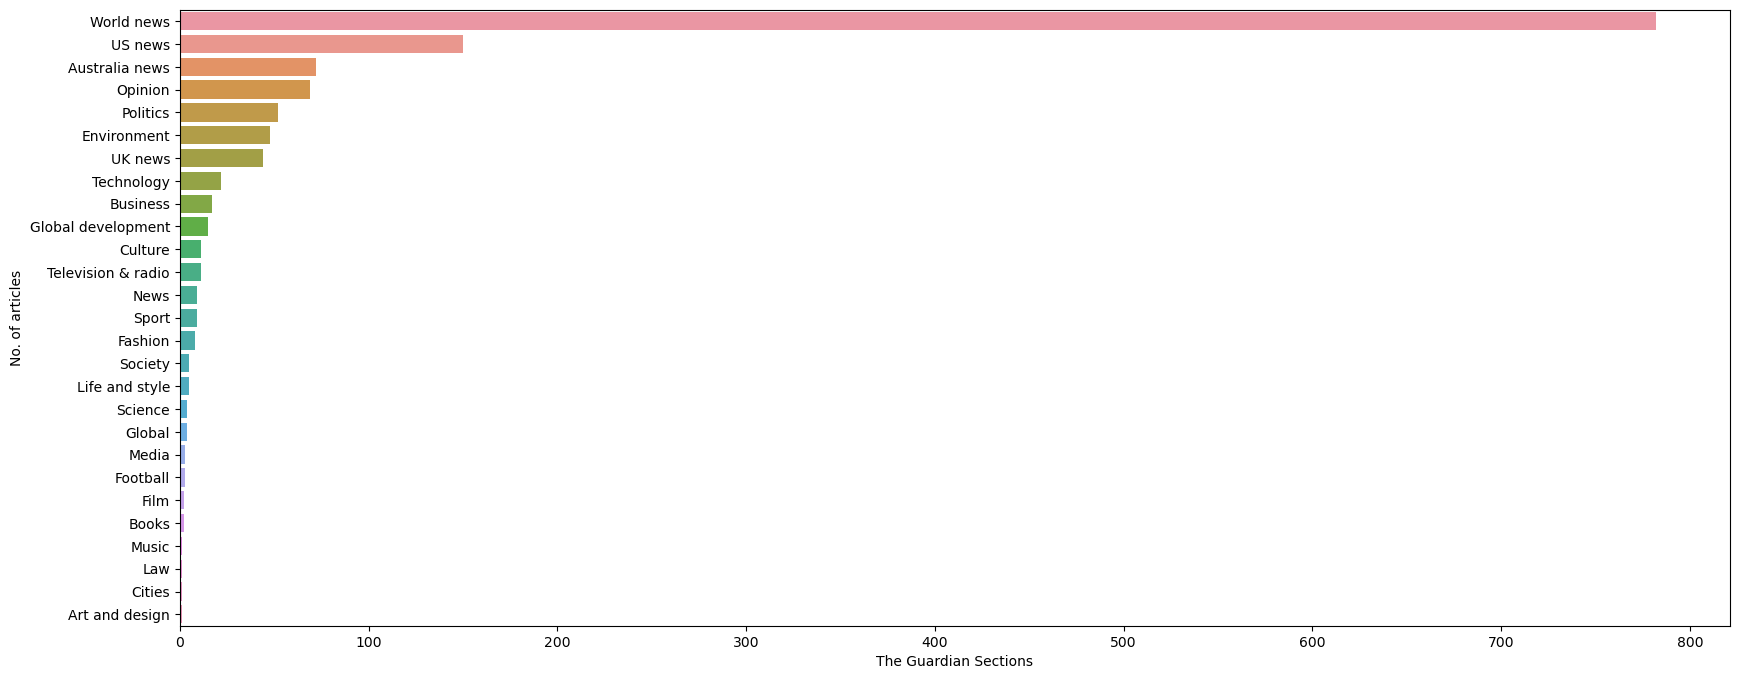

In [39]:
plt.figure(figsize=(20,8))
sb.barplot(data=sec_data, y=sec_data['sectionName'], x=sec_data['count'], orient='h',)
plt.xlabel('The Guardian Sections')
plt.ylabel('No. of articles')
plt.show()

### Part-5. Evolution of articles over time for the mentioned period (since 2018 to today)

In [40]:
## Creating alternate data with count column along with some existing parameters from dataset
altdata=dataset.groupby(['Date','Year','Month','Month_Year','sectionName'])['Date'].agg(['count'])

In [41]:
altdata.reset_index(inplace=True)

In [42]:
altdata

Date  Year  Month  Month_Year  sectionName  count
0     2018-01-22  2018      1  2018-01-01   World news      1
1     2018-01-23  2018      1  2018-01-01     Business      2
2     2018-02-07  2018      2  2018-02-01   World news      2
3     2018-02-08  2018      2  2018-02-01   World news      1
4     2018-02-09  2018      2  2018-02-01  Environment      1
...          ...   ...    ...         ...          ...    ...
1084  2024-05-01  2024      5  2024-05-01        Sport      1
1085  2024-05-01  2024      5  2024-05-01   World news      1
1086  2024-05-03  2024      5  2024-05-01   World news      1
1087  2024-05-05  2024      5  2024-05-01      Opinion      1
1088  2024-05-10  2024      5  2024-05-01   World news      1

[1089 rows x 6 columns]

In [44]:
altdata.replace([np.inf, -np.inf], np.nan, inplace=True)

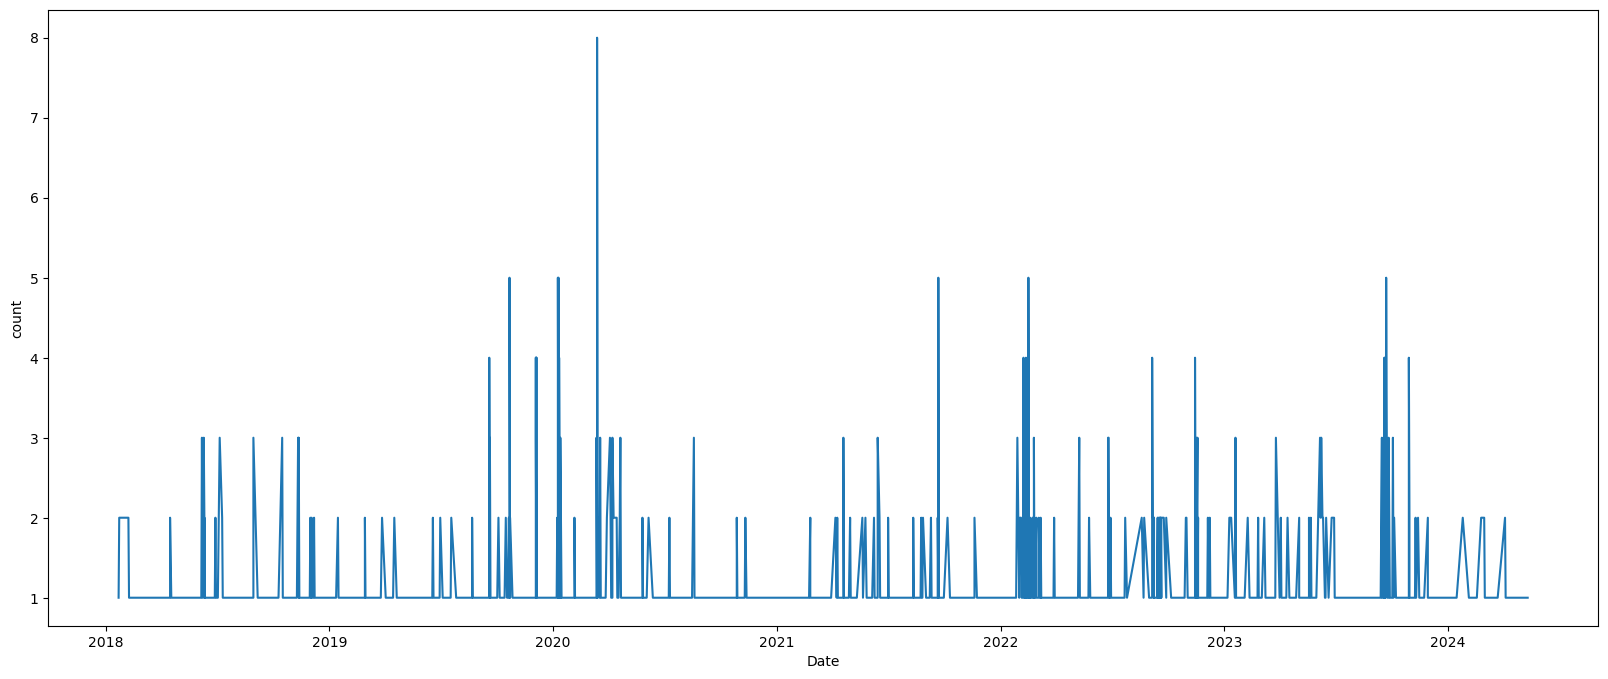

In [45]:
plt.figure(figsize=(20,8))
plt.plot(altdata['Date'], altdata['count'])
plt.xlabel('Date')
plt.ylabel('count')
plt.show()

In [46]:
## To analyze the time-series data better we will summarize the data on month_year
data_month=dataset.groupby('Month_Year')['Month_Year'].agg(['count'])

In [47]:
data_month.reset_index(inplace=True)

C:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


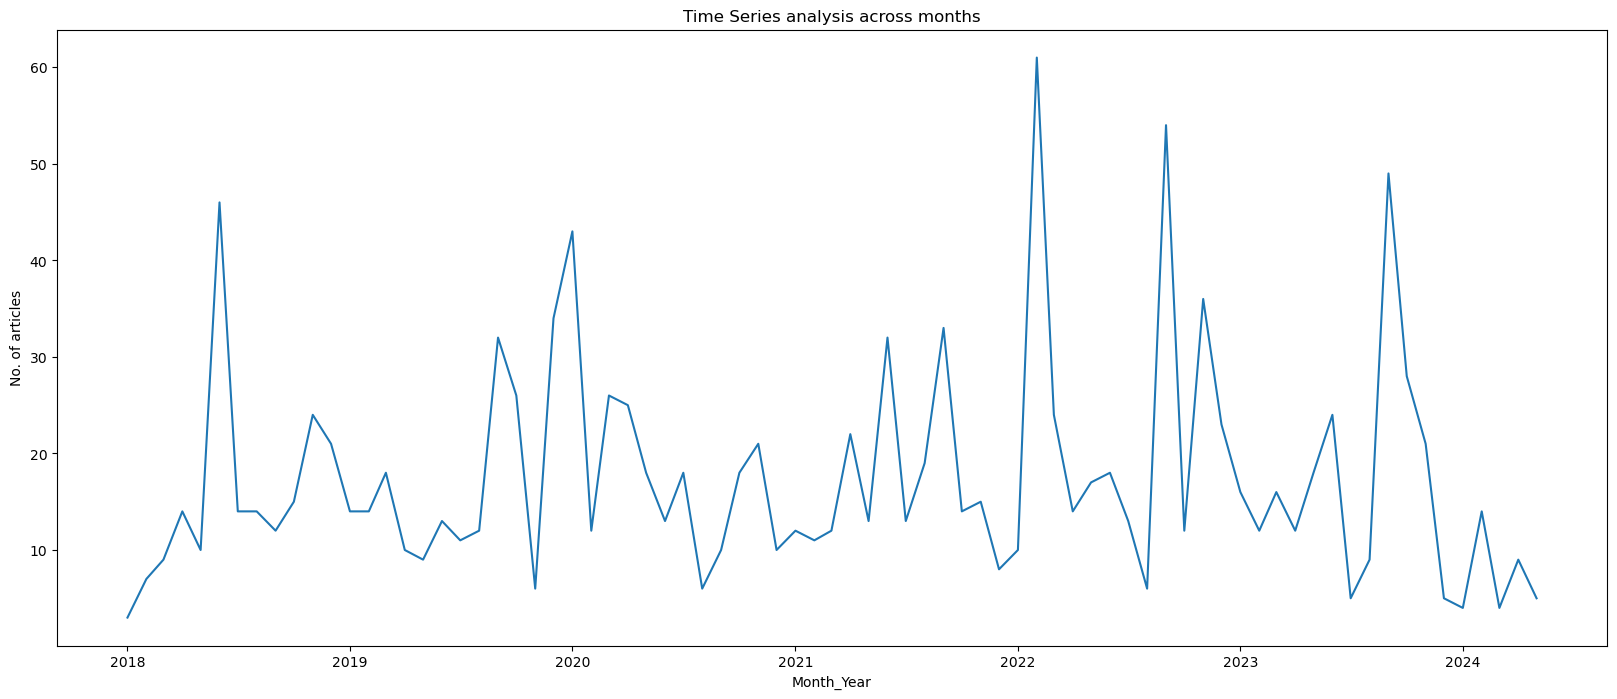

In [48]:
plt.figure(figsize=(20,8))
#plt.plot(data_month['Month_Year'], data_month['count'])
sb.lineplot(altdata, x=altdata['Month_Year'], y=altdata['count'], estimator='sum', errorbar=None)
plt.title("Time Series analysis across months")
plt.xlabel("Month_Year")
plt.ylabel("No. of articles")
plt.show()

#### Identifying if there is any Trend or Seasonal pattern in the articles posted

In [50]:
data_month.set_index('Month_Year',inplace=True)

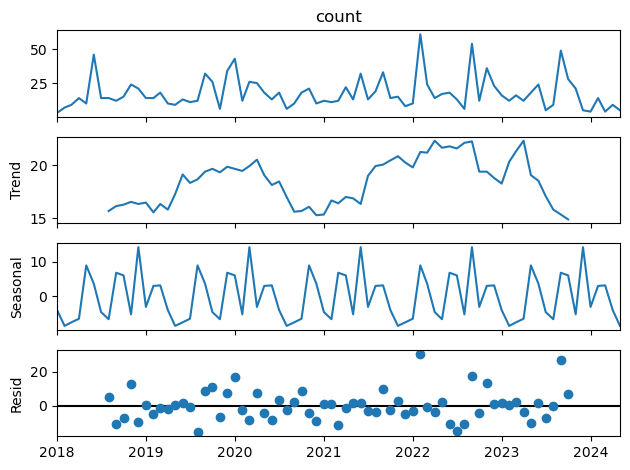

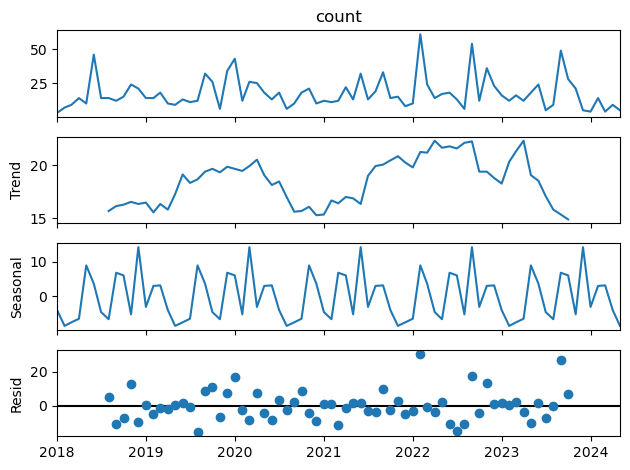

In [118]:
result=seasonal_decompose(data_month['count'], model='additive',period=15)
result.plot()

#### Observation:
* Based on the seasonal decompose charts, we can see that there is no trend and but seasonality is present in the articles posted.

### 6. Are there any unusual events in the time-series under investigation

* Year 2022 has maxuimum articles posted even though average article per day in 2022 is less than 2023
* Specific months have shown high number of articles paosted since 2018

In [119]:
## Continuing from the seasonal decompose
residuals=result.resid

In [120]:
z_scores=(residuals-np.mean(residuals))/np.std(residuals)

In [121]:
outliers=residuals[np.abs(z_scores)>3]

In [122]:
outliers

Month_Year
2022-02-01    30.726889
2023-09-01    26.800222
Name: resid, dtype: float64

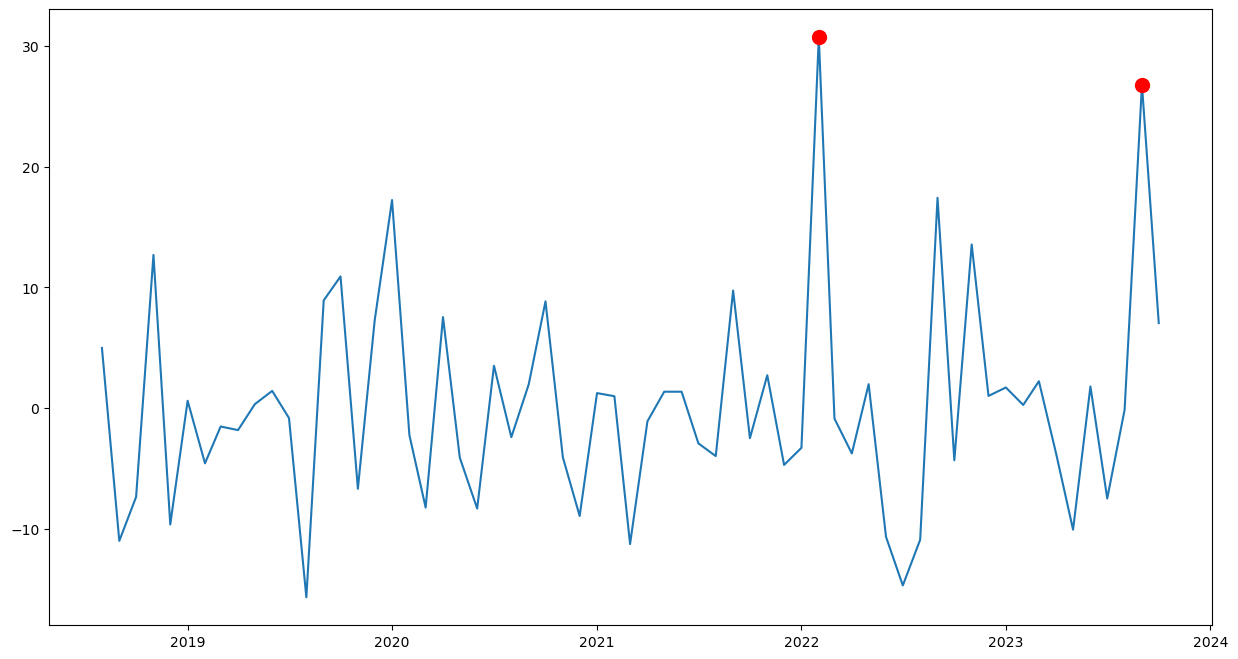

In [123]:
plt.figure(figsize=(15,8))
plt.plot(residuals)
plt.plot(outliers,'ro',markersize=10)
plt.show()

#### Observation: 
* On mutiple period observations (3, 7, 15), common seasonality outlier is in Feb-2022 month.

C:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


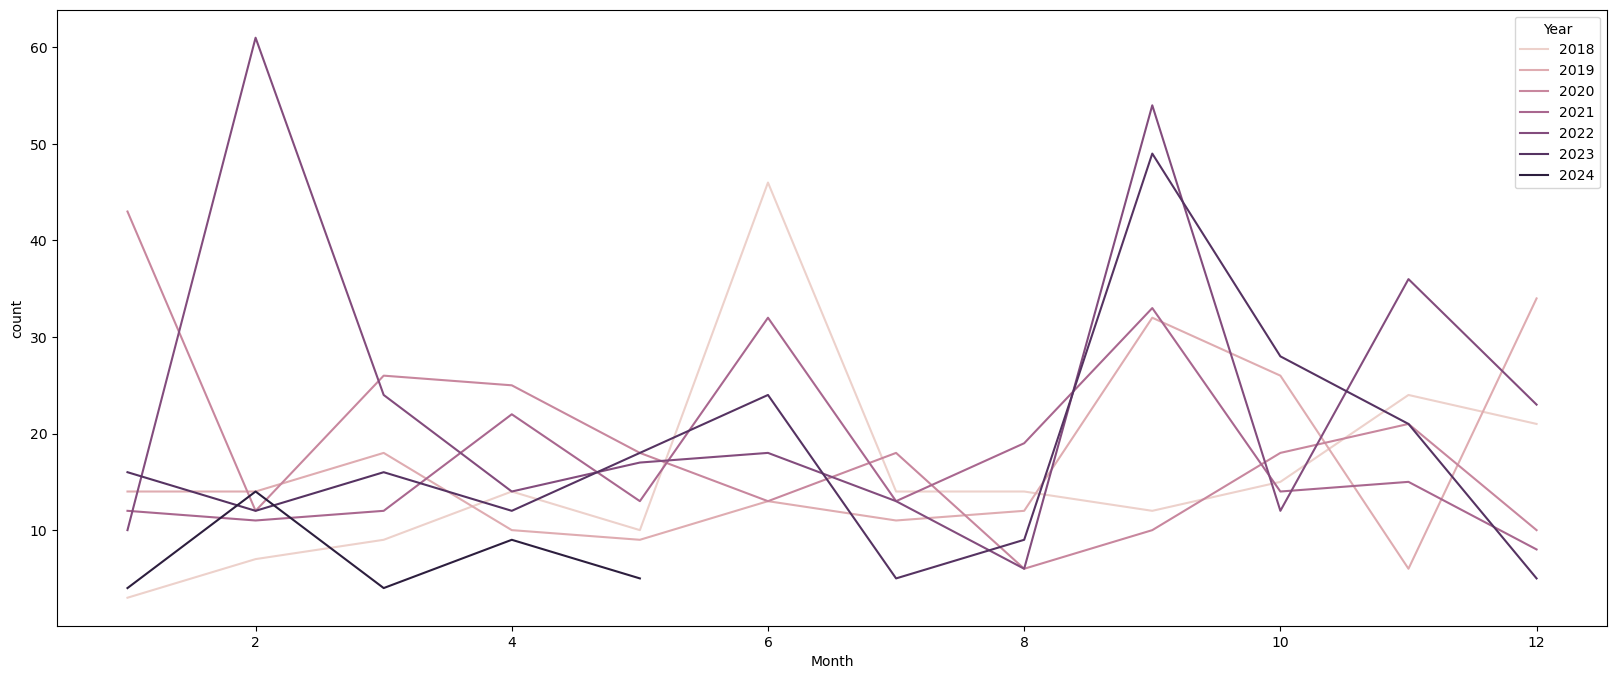

In [53]:
plt.figure(figsize=(20,8))
sb.lineplot(data=altdata, x=altdata['Month'], y=altdata['count'], hue=altdata['Year'], errorbar=None, estimator='sum')
plt.show()

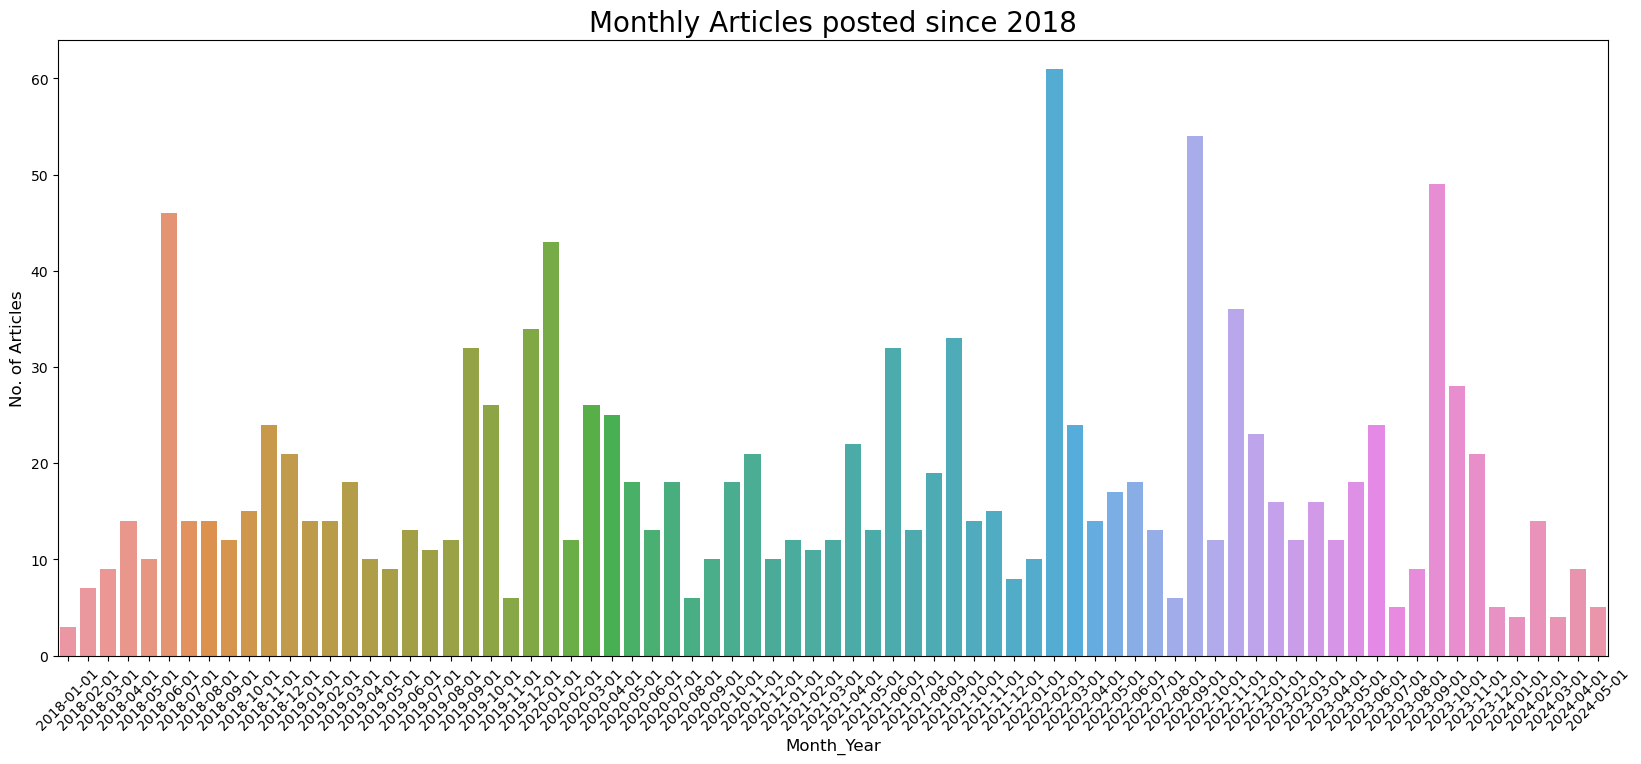

In [54]:
plt.figure(figsize=(20,8))
sb.barplot(data=altdata, x=altdata['Month_Year'], y=altdata['count'], errorbar=None, estimator='sum')
plt.xticks(rotation=45)
plt.title("Monthly Articles posted since 2018", size=20)
plt.xlabel("Month_Year", size=12)
plt.ylabel("No. of Articles", size=12)
plt.show()

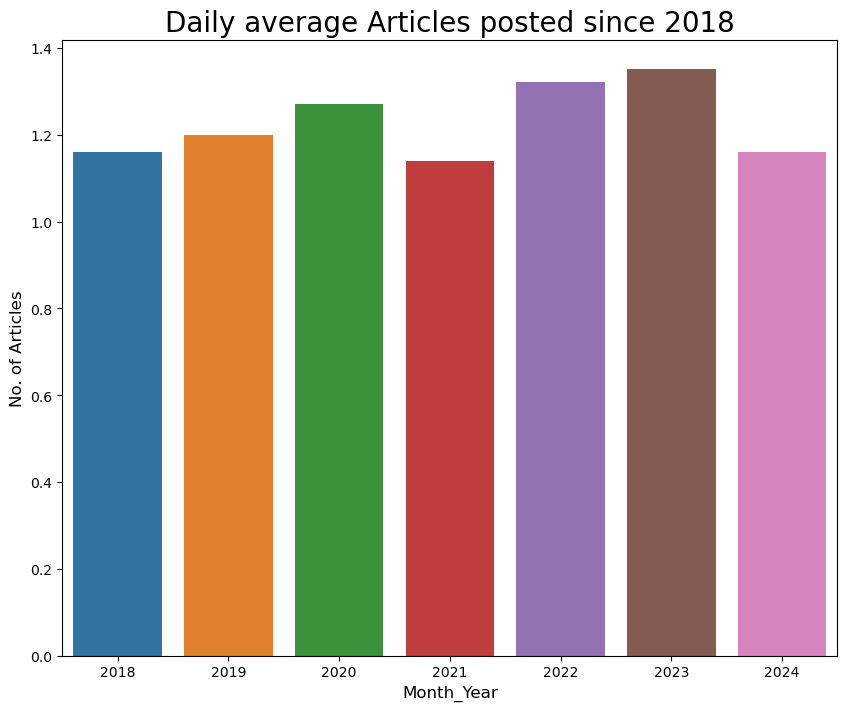

In [55]:
plt.figure(figsize=(10,8))
sb.barplot(data=altdata, x=altdata['Year'], y=altdata['count'], errorbar=None)
plt.title("Daily average Articles posted since 2018", size=20)
plt.xlabel("Month_Year", size=12)
plt.ylabel("No. of Articles", size=12)
plt.show()

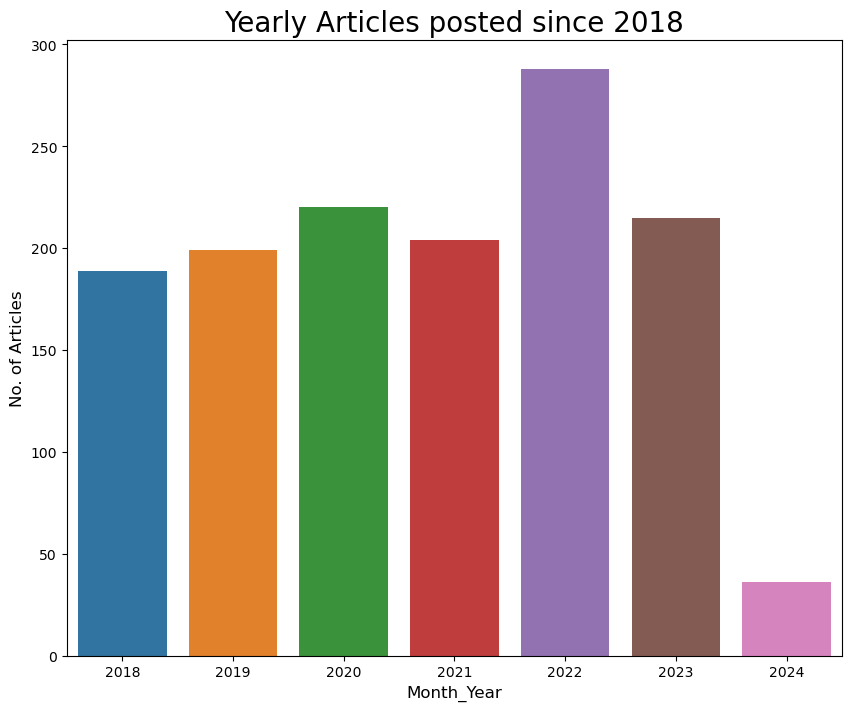

In [56]:
plt.figure(figsize=(10,8))
sb.barplot(data=altdata, x=altdata['Year'], y=altdata['count'], estimator='sum', errorbar=None)
plt.title("Yearly Articles posted since 2018", size=20)
plt.xlabel("Month_Year", size=12)
plt.ylabel("No. of Articles", size=12)
plt.show()

#### Observations:
* From the multiple charts above, we get clear information that 2022 year saw more posts compared all the other years.
* Also this increase in posts was caused by only one outlier month that is February with maximum posts recorded in the complete historic data.

### 7. If so, show these. Why are these unusual? (Define for yourself what you want to show by ordinary or unusual).

In [57]:
data_ts.set_index("Date",inplace=True)

In [58]:
z_scores=(data_ts['No. of articles']-np.mean(data_ts['No. of articles']))/np.std(data_ts['No. of articles'])

In [59]:
z_scores

Date
2018-01-22   -0.525179
2018-01-23    0.319366
2018-02-07    0.319366
2018-02-08   -0.525179
2018-02-09   -0.525179
                ...   
2024-04-26   -0.525179
2024-05-01    0.319366
2024-05-03   -0.525179
2024-05-05   -0.525179
2024-05-10   -0.525179
Name: No. of articles, Length: 833, dtype: float64

In [60]:
outliers=data_ts[np.abs(z_scores)>3]

In [61]:
outliers

No. of articles
Date                       
2018-06-11                7
2019-09-19                7
2019-09-20                6
2019-10-22                8
2019-12-04               12
2019-12-05               10
2020-01-09                7
2020-01-10                6
2020-03-13                9
2021-09-21                8
2022-02-15                6
2022-11-16                6
2023-09-19               10

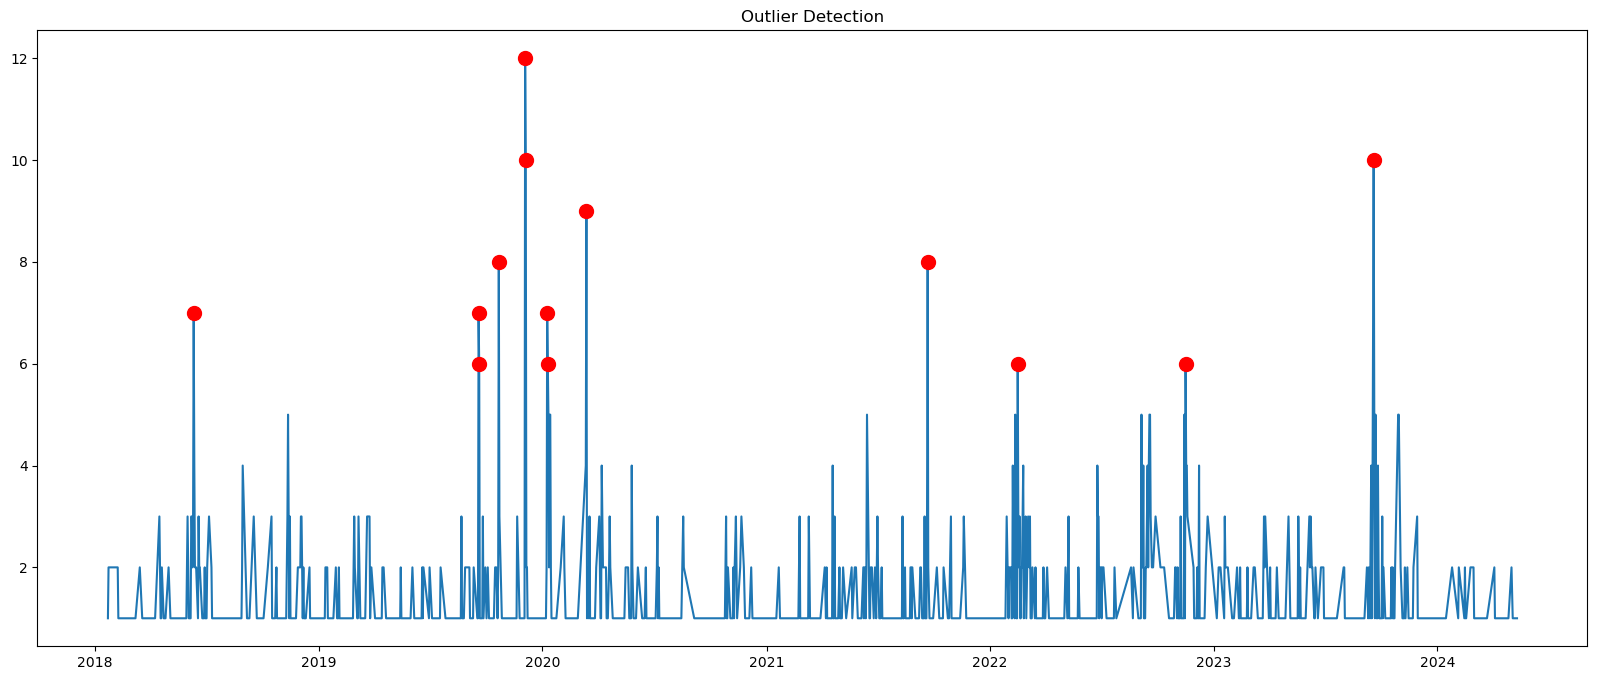

In [62]:
plt.figure(figsize=(20,8))
plt.plot(data_ts['No. of articles'])
plt.title("Outlier Detection on the Orginal Data")
plt.plot(outliers, 'ro',markersize=10)
plt.show()

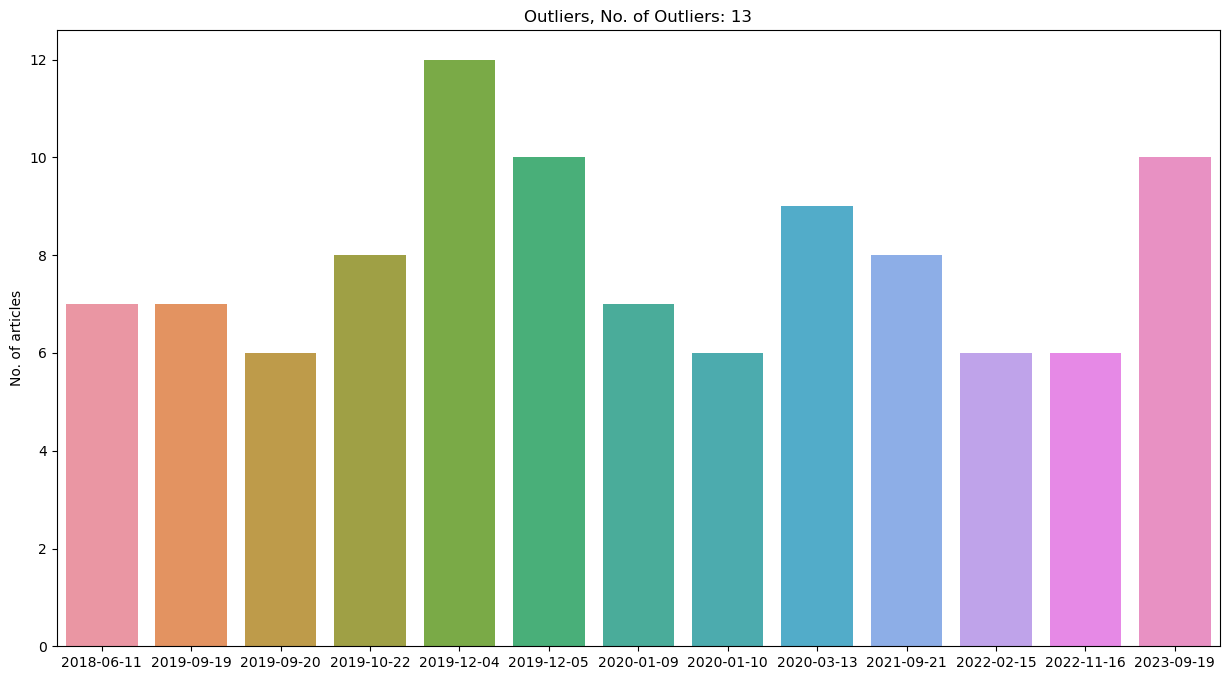

In [63]:
plt.figure(figsize=(15,8))
sb.barplot(outliers, x=outliers.index.values, y=outliers['No. of articles'], errorbar=None, estimator='sum')
plt.title(f"Outliers, No. of Outliers: {len(outliers.index)}")
plt.show()

### 8. Based on question one. Show the cause of the unusual event.

In [64]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [65]:
wordclo=pd.DataFrame()
for k in outliers.index.values:
    df=dataset[['webTitle','Year']][dataset['Date'] == k]
    wordclo=pd.concat([df,wordclo])

In [66]:
wordclo

webTitle  Year
1276  Explainer: what’s behind the growing tensions ...  2023
1277  ‘Credible allegations’ link India to killing o...  2023
1278  Tuesday briefing: Birmingham’s long road back ...  2023
1279  ‘Chill out’: Albanese asked about calling Indi...  2023
1280  Afternoon Update: Australia’s bushfire risk ri...  2023
...                                                 ...   ...
111   Trudeau 'stabbed us in back' on trade, says Tr...  2018
112   Trump, Merkel, Macron: the G7 photos worth a t...  2018
113    Q&A: how damaging was Donald Trump’s G7 blow-up?  2018
114   Hanger-on May is no more than a bit player at ...  2018
115   'Prepare for the worst': souring Canada-US rel...  2018

[102 rows x 2 columns]

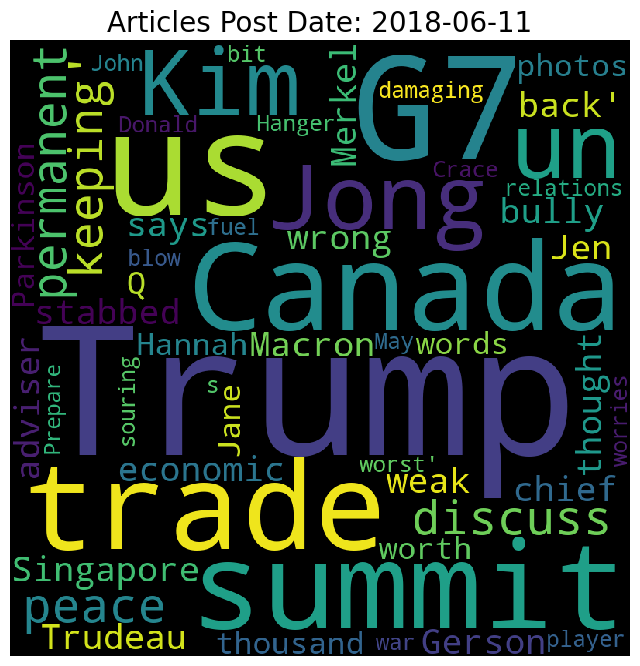

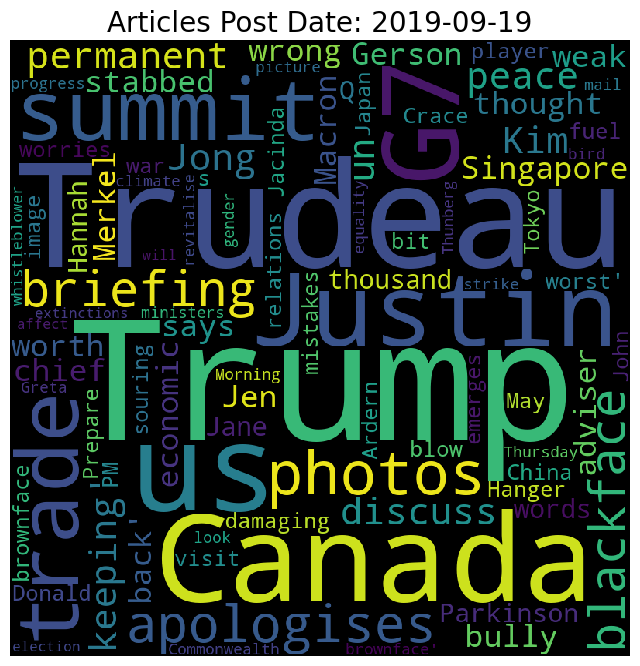

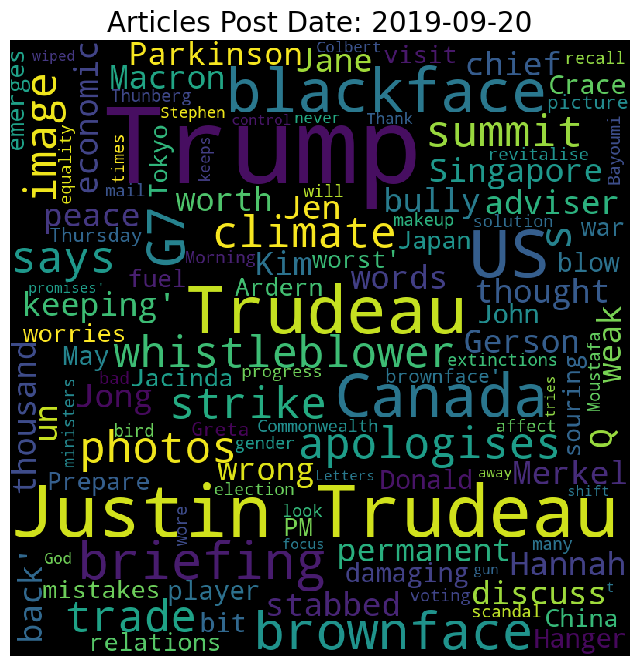

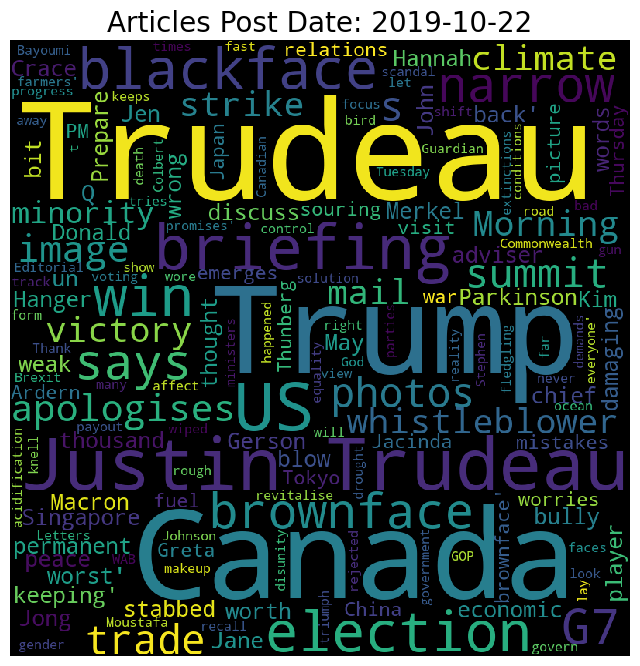

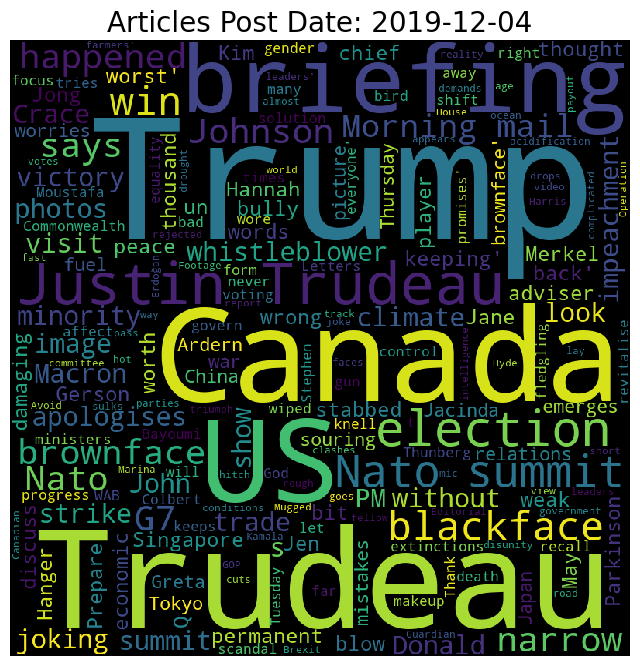

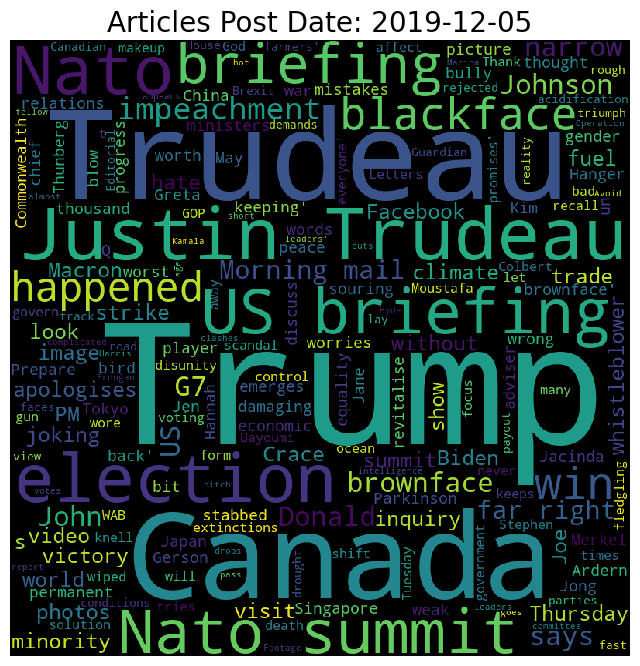

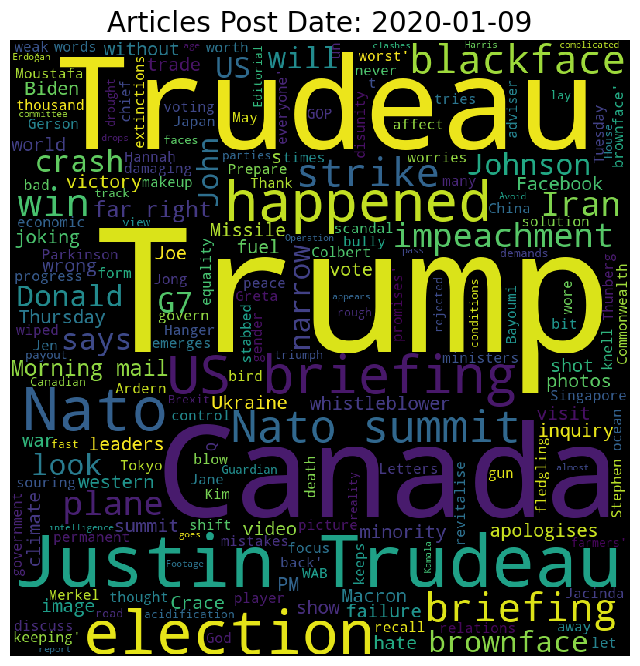

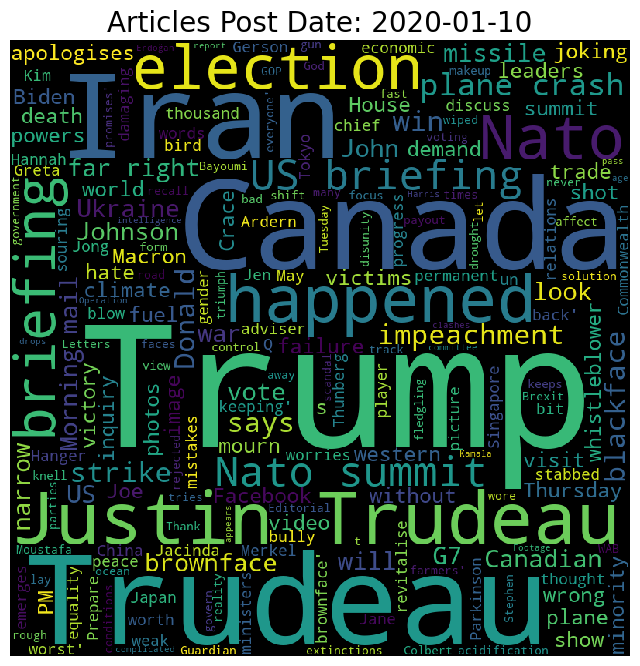

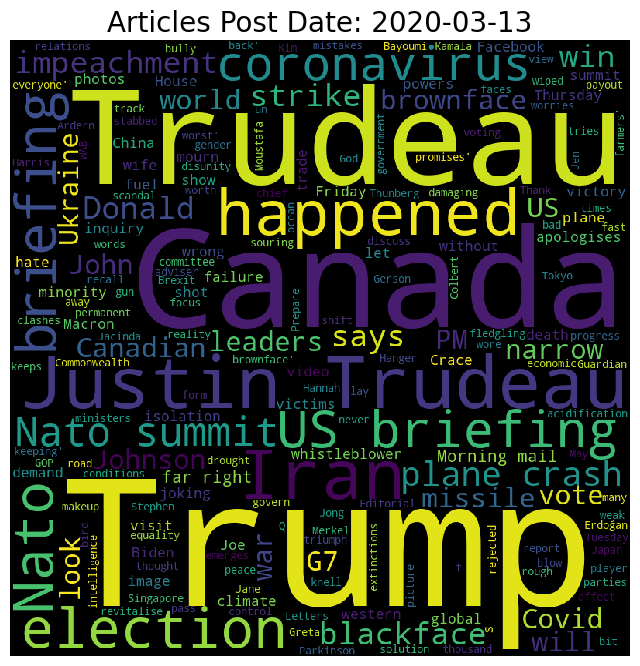

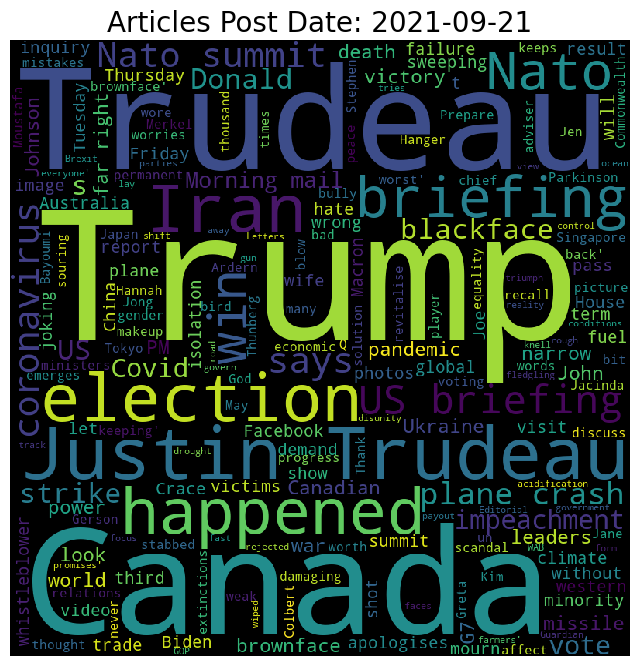

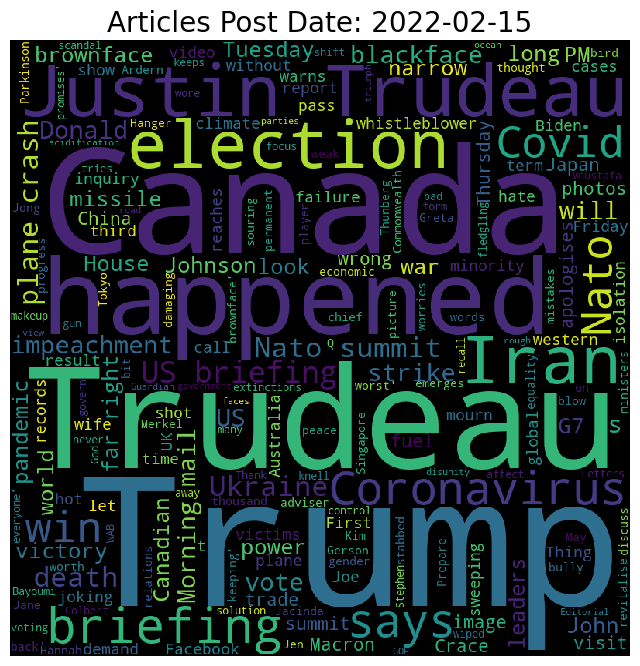

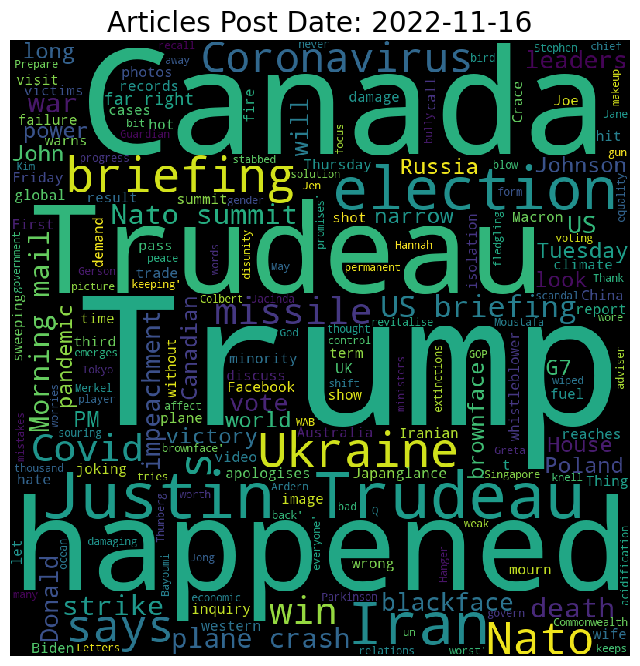

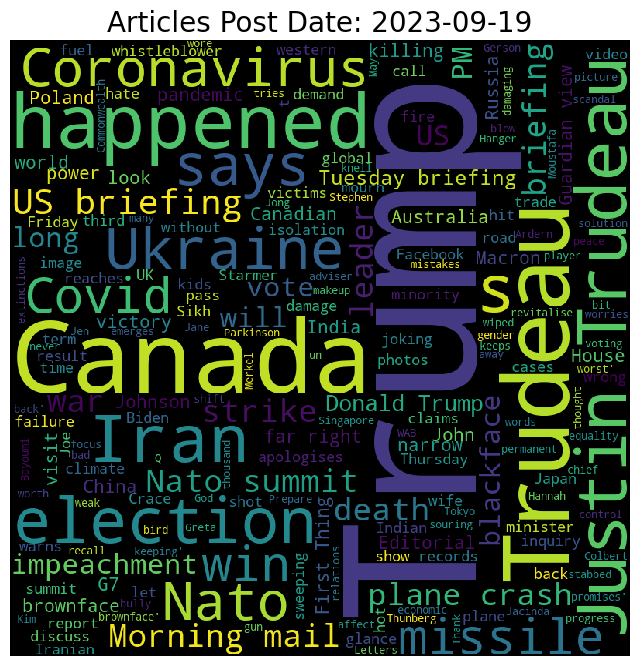

In [67]:
wordlist=''
value=[]
for k in outliers.index.values:
    df=dataset[['webTitle','Year']][dataset['Date'] == k]
    for val in df['webTitle']:
        val=str(val)
        value.append(val)
    wordlist=" ".join(value)
    #print(wordlist)
    
    wordcloud=WordCloud(width=800, height=800,
                        background_color='black',
                        min_font_size=10).generate(wordlist)

    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud, interpolation='nearest', aspect="auto")
    plt.axis("off")
    plt.title(f"Articles Post Date: {k}", size=20)
    #plt.tight_layout(pad=0)
    plt.show()

In [68]:
max_val=max(outliers['No. of articles'])
max_date=''
for m in range(len(outliers['No. of articles'])):
    if max_val==outliers.iloc[m,0]:
        max_date=outliers.index[m]
max_date

datetime.date(2019, 12, 4)

In [69]:
df1=dataset[['webTitle']][dataset['Date'] == max_date]

In [70]:
df1

webTitle
404  House intelligence committee votes to pass imp...
405  Macron clashes with both Erdoğan and Trump at ...
406  US briefing: impeachment, Nato summit and Kama...
407  Footage appears to show world leaders joking a...
408  How does Nato look at the age of 70? It's comp...
409  PM's Operation Avoid Trump goes off almost wit...
410  Trump cuts short Nato summit after fellow lead...
411  What's the joke? Mugged off Trump sulks his wa...
412  Long-term damage from logging hits ability of ...
413  Andrew Sparrow's election briefing: Trump visi...
414  Morning mail: Trump snubs Nato, Taylor inquiry...
415  Boris Johnson denies joking about Donald Trump...

House intelligence committee votes to pass impeachment report – as it happened Macron clashes with both Erdoğan and Trump at Nato summit US briefing: impeachment, Nato summit and Kamala Harris drops out Footage appears to show world leaders joking about Trump at Nato summit How does Nato look at the age of 70? It's complicated PM's Operation Avoid Trump goes off almost without a hitch | Marina Hyde Trump cuts short Nato summit after fellow leaders' hot-mic video What's the joke? Mugged off Trump sulks his way through Nato summit | John Crace Long-term damage from logging hits ability of Canada's forests to regenerate Andrew Sparrow's election briefing: Trump visit ends without jeopardy for Johnson Morning mail: Trump snubs Nato, Taylor inquiry call, Wilderness Society questions Boris Johnson denies joking about Donald Trump at Nato reception and not taking him seriously – as it happened


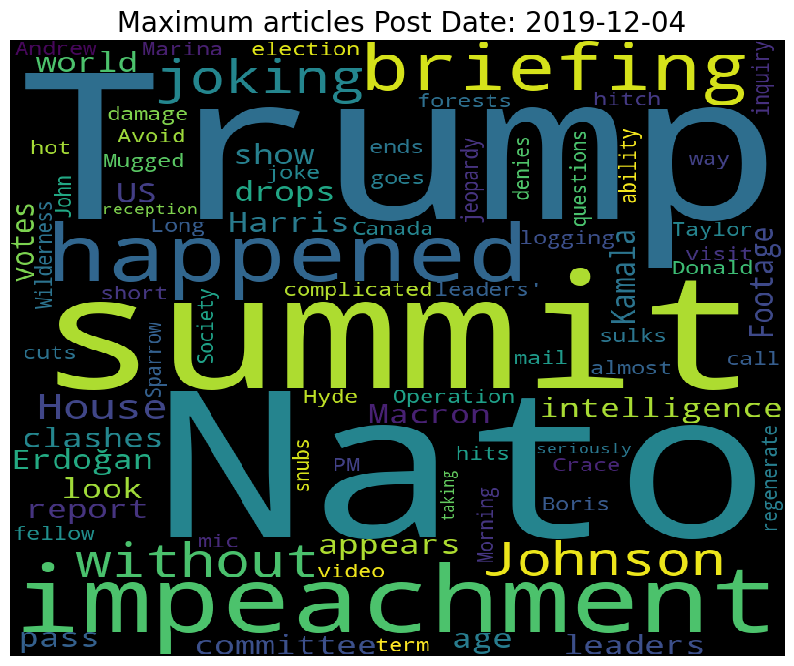

In [71]:
let=[]
for val in df1['webTitle']:
    val=str(val)
    let.append(val)
wordlist=" ".join(let)

#print(wordlist)
wordcloud=WordCloud(width=800, height=800,
                    background_color='black',
                    min_font_size=10).generate(wordlist)

plt.figure(figsize=(10,8), facecolor=None)
plt.imshow(wordcloud, interpolation='nearest', aspect="auto")
plt.axis("off")
plt.title(f" Maximum articles Post Date: {max_date}", size=20)
#plt.tight_layout(pad=0)
plt.show()

In [72]:
data_2022=dataset[['webTitle','Date']][dataset['Year'] == 2022]
data_2022.reset_index(inplace=True)


In [73]:
data_2022.drop(columns='index', inplace=True)

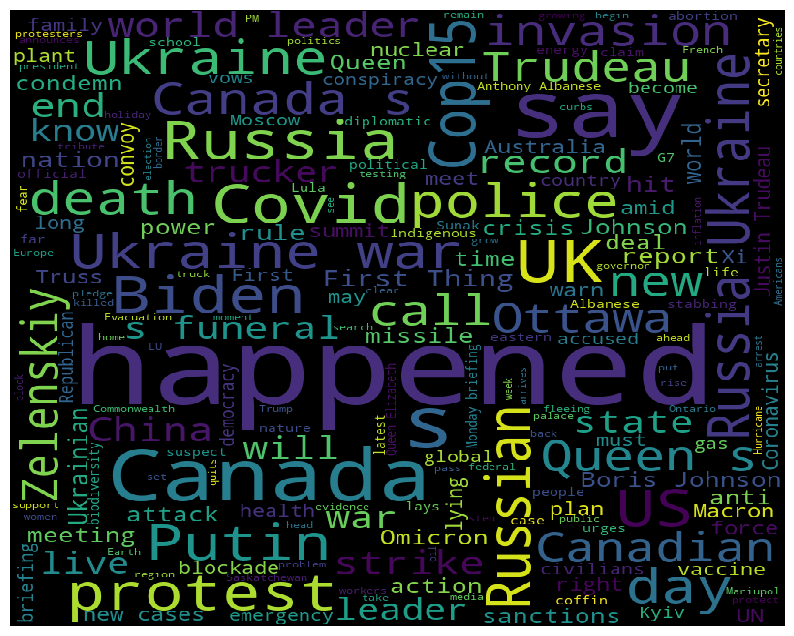

In [74]:
## For year 2022 we will analyse as 2022 posted maximum articles
lets=[]
wordlist=''
for k in range(data_2022.shape[0]):
    lets.append(data_2022.iloc[k,0])
wordlist=" ".join(lets)
#print(wordlist)

wordcloud=WordCloud(width=800, height=800,
                    background_color='black',
                    min_font_size=10).generate(wordlist)

plt.figure(figsize=(10,8), facecolor=None)
plt.imshow(wordcloud, interpolation='nearest', aspect="auto")
plt.axis("off")
#plt.title(f"Articles Post Date: {k}", size=20)
#plt.tight_layout(pad=0)
plt.show()

C:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


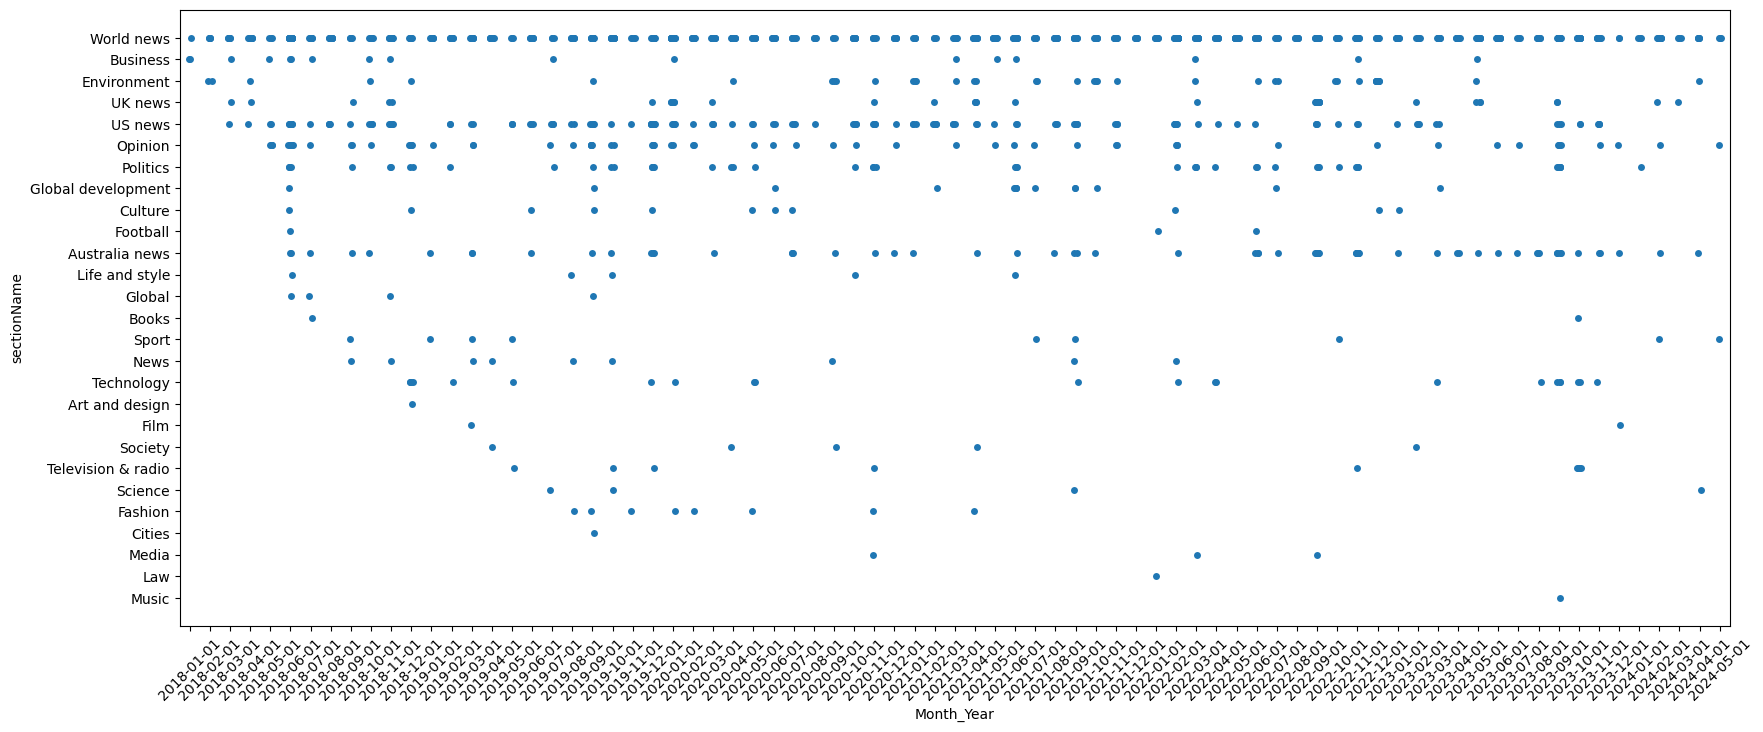

In [75]:
plt.figure(figsize=(20,8))
sb.stripplot(data=dataset,y=dataset['sectionName'],x=dataset['Month_Year'])
plt.xticks(rotation=45)
plt.show()

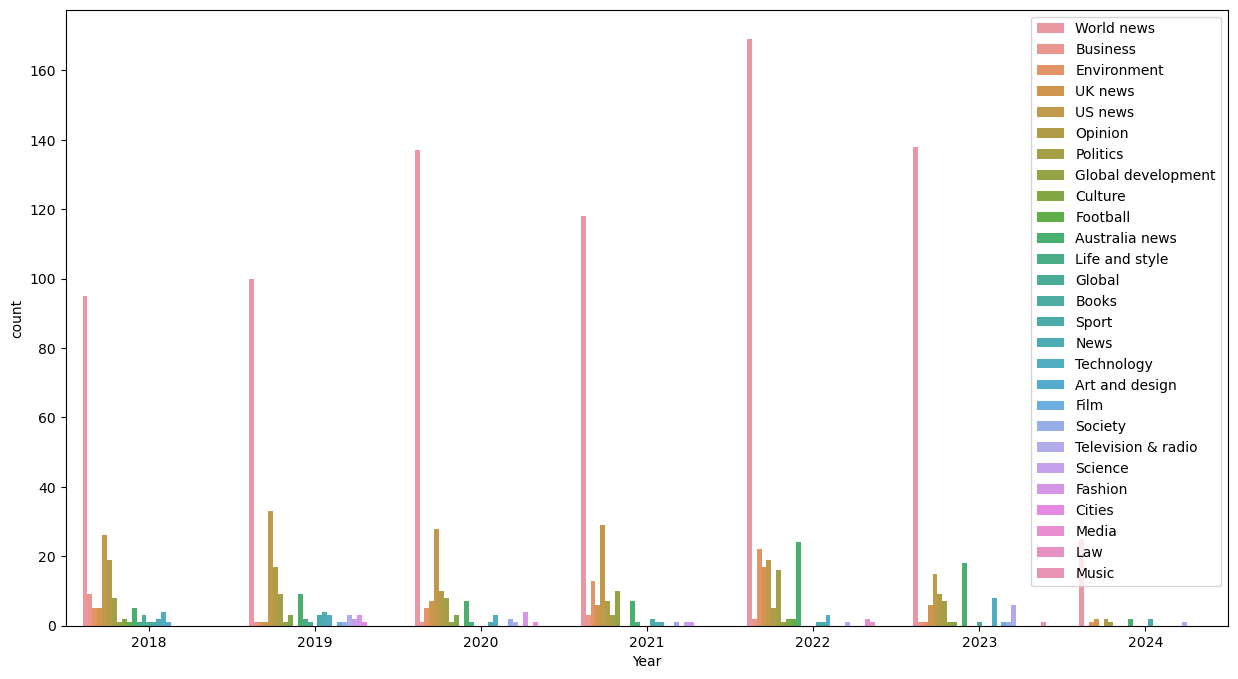

In [76]:
plt.figure(figsize=(15,8))
sb.barplot(data=altdata,x= altdata['Year'], y=altdata['count'], hue=altdata['sectionName'], orient='v',estimator='sum', errorbar=None)
plt.legend(loc='best')
plt.show()

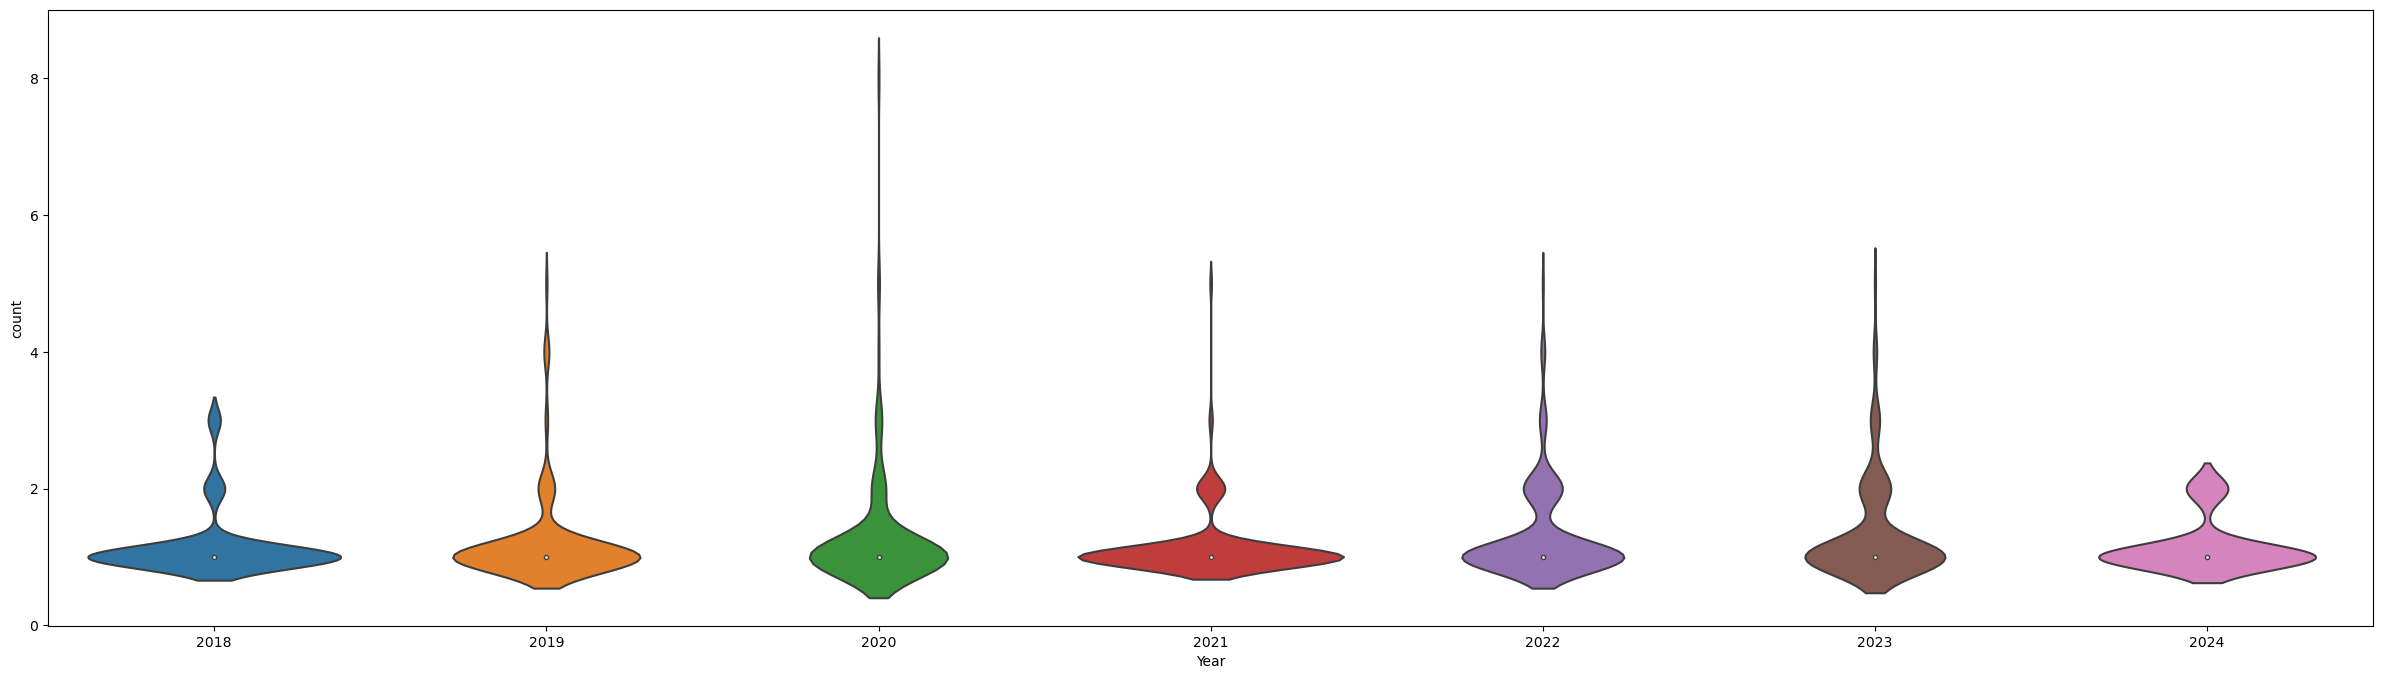

In [77]:
plt.figure(figsize=(30,8))
sb.violinplot(data=altdata, x=altdata['Year'], y=altdata['count'])
plt.show()